# Árboles de Decisión
### Padecimientos cardíacos

## Carga de datos y librerias basicas

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

pacientes = pd.read_csv("pacientes.csv")

#### Esta base de datos esta conformada por 3 columnas:
* edad: representa el numero de edad de cada pasiente.
* colesterol: representa el nuvel de colesterol de cada pasiente.
* problema_cardiaco: indica con 1 si el pasiente tiene problemas cardiacos y 0 si no tiene problemas cardiacos.

## Grafica de dispersión

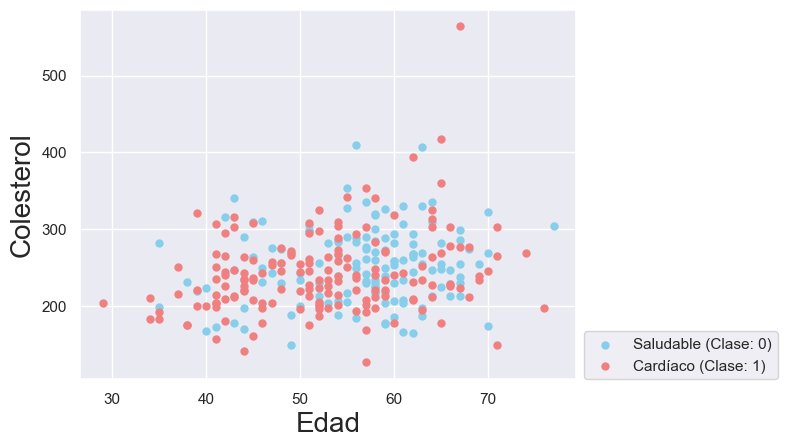

In [72]:
# Separamos los datos entre pasientes saludables y con problemas cardiacos
saludables = pacientes[pacientes["problema_cardiaco"]==0]
cardiacos = pacientes[pacientes["problema_cardiaco"]==1]

plt.xlabel('Edad', fontsize = 20.0)
plt.ylabel('Colesterol', fontsize = 20.0)
plt.scatter(saludables["edad"], saludables["colesterol"], 
            label="Saludable (Clase: 0)", marker=".",
            c="skyblue", s=100) # graficar pasientes saludables de color azul
plt.scatter(cardiacos["edad"], cardiacos["colesterol"],
            label="Cardíaco (Clase: 1)", marker=".",
            c="lightcoral", s=100)# graficar pasientes con problemas de cardiacos en rojo
plt.legend(bbox_to_anchor=(1, 0.15))
plt.show()

# Ejemplo/Explicación de Entropía:
#### Promedio de información almacenada en una variable aleatoria

In [60]:
from scipy.stats import entropy

edades = pd.Series([40, 30, 20, 50])
colesterol = pd.Series([100, 200, 100, 200])
estado_fisico = pd.Series(['buena', 'mala', 'regular', 'buena'])

print(edades.value_counts() / edades.size,'\n')
print(colesterol.value_counts() / colesterol.size,'\n')
print(estado_fisico.value_counts() / estado_fisico.size,'\n\n')

print( entropy( edades.value_counts() / edades.size, base=2))
print( entropy( colesterol.value_counts() / colesterol.size, base=2))
print( entropy( estado_fisico.value_counts() / estado_fisico.size, base=2))

40    0.25
30    0.25
20    0.25
50    0.25
Name: count, dtype: float64 

100    0.5
200    0.5
Name: count, dtype: float64 

buena      0.50
mala       0.25
regular    0.25
Name: count, dtype: float64 


2.0
1.0
1.5


# Datos de Entrenamiento y Prueba

In [44]:
from sklearn.model_selection import train_test_split

# aqui definimos los datos de entrenamiento y de prueba
datos_entrena, datos_prueba, clase_entrena, clase_prueba = train_test_split(
    pacientes[["edad", "colesterol"]],
    pacientes["problema_cardiaco"], 
    test_size=0.30)


# Creación del Árbol de Decisión

In [62]:
from sklearn import tree

arbol_decision = tree.DecisionTreeClassifier(criterion="entropy", max_depth=2)

arbol = arbol_decision.fit(datos_entrena, clase_entrena)

accuracy = arbol_decision.score(datos_prueba, clase_prueba)

print(accuracy,'\n\n')

print(tree.export_text(arbol,
                      feature_names=["Edad", "Colesterol"]))

0.6666666666666666 


|--- Edad <= 54.50
|   |--- Colesterol <= 173.50
|   |   |--- class: 0
|   |--- Colesterol >  173.50
|   |   |--- class: 1
|--- Edad >  54.50
|   |--- Colesterol <= 337.50
|   |   |--- class: 0
|   |--- Colesterol >  337.50
|   |   |--- class: 1



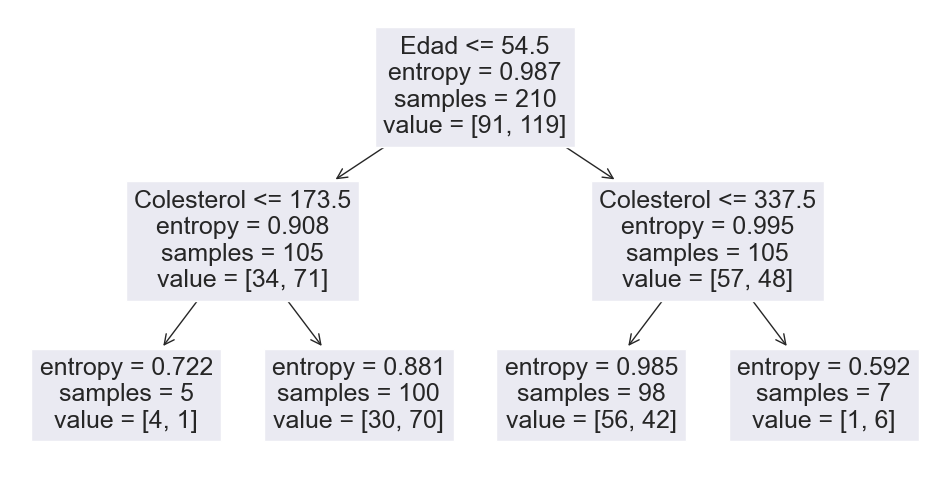

In [63]:
plt.figure(figsize=(12, 6))
tree.plot_tree(arbol, 
              feature_names=["Edad", "Colesterol"])
plt.show()

# Clasifica a nuevos pacientes

In [64]:
print("Nuevo paciente", arbol_decision.predict([[70, 150]]))

Nuevo paciente [0] 




c:\Users\A\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR>